<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 0 - Introducción a Redes Neuronales </H3>

<hr style="height:2px;border:none"/>
<p align='center'> Alfredo Silva Celpa   201373511-8 </p>
<p align='center'> Margarita Bugueño Pérez   201373510-K </p>

**Temas**  
* NNs por dentro: *back-propagation from scratch*.
* Principales hiperparámetros de *back propagation*
* Introducción a keras
* Verificación numérica de las derivadas implementadas.

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de responder preguntas sobre cada punto del trabajo realizado*)
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 30 de Marzo.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF395-I-2018]

<hr style="height:2px;border:none"/>


#### Paquetes instalación
Para poder trabajar en el curso se necesitará instalar librerías para Python, por lo que se recomienda instalarlas a través de *anaconda* (para Windows y sistemas Unix) en un entorno virtual, donde podrán elegir su versión de Python. Se instalarán librerías como __[*sklearn*](http://scikit-learn.org/stable/)__, una librería simple y de facil acceso para *data science*, __[*keras*](https://keras.io/)__ en su versión con GPU (para cálculo acelerado a través de la tarjeta gráfica), además de que ésta utiliza como *backend* *TensorFlow* o *Theano*, por lo que habrá que instalar alguno de éstos, además de las librerías básicas de *computer science* como *numpy*, *matplotlib*, *pandas*, además de claramente *jupyter*.

* __[Descargar anacona](https://www.anaconda.com/download/#linux)__ 

* Luego de instalar Anaconda y tenerla en el *path* de su computador crear un entorno virtual: 
```
conda create -n redesneuronales python=version
```

con *version*, la version de Python que desea utilizar. Si está en Windows, se recomienda Python 3 debido a dependencias con una de las librerías a utilziar.
 
* Acceder al ambiente creado 
```
source activate redesneuronales
```

* Instalar los paquetes a utilizar
```
conda install jupyter sklearn numpy pandas matplotlib keras-gpu tensorflow-gpu 
```

* Para salir del entorno
```
source deactivate redesneuronales
```
<hr style="height:1px;border:none"/>


La tarea se divide en cuatro secciones:

[1.](#primero)   Back-propagation (BP) from *Scratch*   
[2.](#segundo)   Comparar back-propagation (BP) de Keras  
[3.](#tercero)   Verificación numérica del gradiente para una componente  
[4.](#cuarto)   Implementar momentum como variante

<a id="primero"></a>
## 1. Back-propagation (BP) from *Scratch*

BP (Back-propagation) es sin duda el paradigma dominante para entrenar redes neuronales *feed-forward*. En
redes grandes, diseñadas para problemas reales, implementar BP eficientemente puede ser una tarea delicada
que puede ser razonable delegar a una librerı́a especializada. Sin embargo, construir BP *from scratch* es muy
útil con fines pedagógicos.

$$ w^{(t+1)} \leftarrow w^{(t)} - \eta \nabla_{w^{(t)}} Loss $$
 
> a) Escriba un programa que permita entrenar una red FF con una arquitectura fija de 2 capa ocultas (con 32 neuronas en la primera capa y 16 en la segunda) y $K$ neuronas de salida, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal. Por simplicidad, asuma funciones de activacion y error (*loss function*) diferenciables o subdiferenciables, además de tener la misma función de activación para las 2 capas ocultas. Adapte la arquitectura para un problema de clasificación de 3 clases, es decir la función de activación para la capa de salida debe ser **softmax** con número de neuronas $K$=3. Escriba funciones para:  
* (i)  implementar el *forward pass*  
* (ii) implementar el *backward pass*  
* (iii) implementar la rutina principal de entrenamiento, adoptando, por simplicidad, la variante cíclica aleatorizada de SGD (un ejemplo a la vez, pero iterando cíclicamente sobre una configuración aleatoria del conjunto de entrenamiento) con una tasa de aprendizaje fija de 0.1 y número de ciclos fijos (*epochs*).



Backpropagation es un método de cálculo de gradientes utilizado en algoritmos de aprendizaje supervisado, más específicamente, en redes neuronales artificiales. El método emplea un ciclo propagación de dos fases hacia adelante y hacia atrás (forwarding y backwarding) a fin de adaptar los parámetros del learner.  

Para escribir el programa solicitado, haciendo uso tan sólo de la librería numpy, es necesario definir unas cuantas funciones auxiliares. Entre llas, las funciones de activación a utilizar por el algoritmo, sus derivadas, funciones loss, así como otras funciones para el establecimiento de las estructuras a utilizar por este.

In [33]:
import numpy as np

#Algunas constantes que se usaran en las funciones
epsilon=1e-8 #erA 15
epsilon_gigantes=600
x_muy_grande=600
#constante para aproximar RELU
K=0.999

def sigmoidal(x):
    if (x>0):
        x = np.maximum(epsilon,x)
        return 1/(1+ np.exp(-x))
    elif(x<0):
        x = np.maximum(-600,x)
        return 1/(1+ np.exp(-x))
    else:
        return 1/(1+ np.exp(-(epsilon)))

def d_sigmoidal(x):
    return sigmoidal(x)*(1-sigmoidal(x))

def relu(x):#probar sin los trukillos
    if x>0:
        return x
    elif x<=0:
        return 0

def d_relu(x):#probar sin los trikullos
    if x<-0.0000001:
        return 0
    elif x>0.0000001:
        return 1
    else:
        return np.exp(2*K*x)/(np.exp(2*K*x)+1)
    

def softmax(x): #Se utiliza la aproximacion de keras
    b=np.max(x)
    e=np.exp(x-b)
    return e/np.sum(e)

def softmaxcomp(x,i):#i={0,1,2}
    b = np.max(x)
    e = np.exp(x-b)
    v = e/np.sum(e)
    return v[i]

def d_softmax(x):
    return softmax(x)*(np.subtract(1,softmax(x)))

def d_softmax_comp(x,i):# RECORDAR: Devuelve un vector de softmax
    v=[0,0,0]
    for j in range(3):
        if i==j:
            v[i] = softmaxcomp(x,i)*(np.subtract(1,softmaxcomp(x,i)))
        else:
            v[j] = -softmaxcomp(x,j)*softmaxcomp(x,i)
    return v

def error_mse(ytrue, ypred):
    return (0.5)*((np.subtract(ytrue,ypred))**2)

def d_error_mse(ytrue, ypred):
    return (np.subtract(ytrue,ypred))

def error_CE(ytrue,ypred):
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon) 
        temp=-(ytrue[i]*np.log(aux))
        vector_retorno.append(temp)
    return vector_retorno

def d_error_CE(ytrue,ypred):
    vector_retorno=[]
    for i in range(len(ytrue)):
        aux = np.maximum(ypred[i],epsilon)
        temp = -ytrue[i]/aux
        vector_retorno.append(temp)
    return vector_retorno


#definicion del modelo y su arquitectura
#total capas= capas ocultas + capa de salida
def size_layers(total_capas,input_size,n_capa_o1, n_capa_o2, n_capa_out):
    sizes=np.arange(total_capas+1)
    sizes[0]=input_size
    sizes[1]=n_capa_o1
    sizes[2]=n_capa_o2    
    sizes[3]=n_capa_out
    return sizes

def iniciar_estructuras(total_capas,tamanios_arquit):
    salida_l=[]
    da_salida_l=[]
    e_salida_l=[]
    for i in np.arange(total_capas+1):        
        if i<total_capas:
            salida_l.append(np.zeros(tamanios_arquit[i+1]))
        else: 
            salida_l.append(np.zeros(tamanios_arquit[0]))
            
    da_salida_l=salida_l.copy()
    e_salida_l=salida_l.copy()
    m_pesos=[]
    for i in np.arange(total_capas):
        m_pesos.append(np.random.uniform(-0.1,0.1,([tamanios_arquit[i],tamanios_arquit[i+1]])))
    e_m_pesos=[]
    for i in np.arange(total_capas):
        e_m_pesos.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))  
    momentums=[]
    for i in np.arange(total_capas):
        momentums.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))
      
    return salida_l, da_salida_l, e_salida_l, m_pesos, e_m_pesos, momentums  

def one_hot(posicion):
    array=np.zeros(3)
    array[posicion]=1
    return array


In [7]:
def vector2hot(vector):
    array=np.zeros(len(vector))
    posicion=np.argmax(vector)
    array[posicion]=1.0
    return array

La entrada a la red, dato de entrenamiento, se propaga desde la primera capa (capa de entrada) a través de las capas ocultas, hasta llegar a la capa de salida y generar una predicción. Este subproceso se conoce como Forwarding o propagación hacia adelante y se ha definido de la siguiente manera:

In [8]:
def forwarding(total_capas, vector_x, salida_l, da_salida_l,m_pesos, vector_arquit, f_activ, arg):
    vector=vector_x.copy() 
    salida_l[-1]=vector.copy()
    da_salida_l[-1]=vector.copy()
    
    for capa in range(total_capas-1):
        salida_capa=[]
        d_salida_capa=[]

        for neurona in range(vector_arquit[capa+1]):
            #pesos como vector columna de m_pesos
            w=(m_pesos[capa].T[neurona]).copy() #vector pesos hacia neurona desde las xs inputs (vector dimesion entrada a capa)
            temp= np.dot(vector,w)
            
            if f_activ=="sigmoid":
                temp1=sigmoidal(temp)
                temp2=d_sigmoidal(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
                
            else: 
                temp1=relu(temp)
                temp2=d_relu(temp)
                salida_capa.append(temp1)
                d_salida_capa.append(temp2)
        salida_l[capa]=salida_capa.copy()
        da_salida_l[capa]=d_salida_capa.copy()
        vector=salida_capa.copy()
    salida_last_t=[]
    d_salida_last=[] 
    
    for neurona in range(vector_arquit[-1]):
        w=(m_pesos[-1].T[neurona]).copy() #vector pesos entre ult. capa oculta y la capa out (dimesion largo de capa anterior)
        temp= np.dot(vector,w) #elemento i-esimo entrada a softmax (de la salida de la capa)
        salida_last_t.append(temp)   
        
    salida_last=softmax(salida_last_t)
    d_salida_last=d_softmax_comp(salida_last_t,arg)
    salida_l[-2]=salida_last.copy()
    da_salida_l[-2]=d_salida_last.copy()
    vector=salida_last.copy()
    return vector

Las señales de error se propagan hacia atrás, iniciando en la capa de salida hacia todas las neuronas de la capa oculta  que contribuyen directamente a dicha salida. Como cada neurona de la capa oculta, directamente conectada a la capa de salida, sólo recibe una porción de la señal total de error, es necesario repetir este procedo a fin de propagar estas tasas de error a las demás capas ocultas y actualizar así todos los parámetros del modelo.  
Este subproceso se basa en el cálculo de gradientes de manera tal que cada peso de la red se modifica en base a lo siguiente:

\begin{equation}
w_{t+1} \leftarrow w_{t} + \eta \nabla_{w^{(t)}} Loss \\
\end{equation}

In [9]:
def backwarding(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos):

    if tipo_error=="mse":
        error_EA=np.sum(d_error_mse(vector_y,salida_l[-2]))
        
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])
        error_EA = np.sum(error_EA)
    
    m_pesos_copia = m_pesos.copy()    
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])        
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()-(tasa*error_EW_n)
        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()
        
    e_salida_l[total_capas-1]=error_EA.copy()      
    for capa in np.arange(total_capas-2,-1,-1): 
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() 
        for neurona in range(vector_arquit[capa+1]):
            #error_EA_s=np.sum(e_salida_l[capa+1]*da_salida_l[capa][neurona]*m_pesos_copia[capa].T[neurona] ) 
            error_EA_s=np.sum(e_salida_l[capa+1]*np.array(da_salida_l[capa+1])*m_pesos_copia[capa+1][neurona])            
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])            
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            arreglo=(pesos_auxiliar2[neurona]-(tasa*error_EW_s)).copy() 
            pesos_auxiliar2[neurona]=arreglo.copy() 
            m_pesos[capa]=(pesos_auxiliar2.T).copy()
            error_aux.append(error_EA_s.copy())
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

La función shuffling desordenará los ejemplos entre una epoch y otra, así se asegura que durante el proceso de entrenamiento el modelo se mantenga general y con menor overfitting.
En gradiente decendiente, cuando cada batch tiene tamaño 1, uno quiere desordenar los datos después de cada epoch para mantener el aprendizaje generalizado. Por ejemplo: si el dato 17 siempre viene del dato 16, su propio gradiente presentará bias con respecto a la actulización que genere el dato 16 en el modelo; entonces al mezclar los datos nos aseguramos que cada dato cree un cambio "independiente" en el modelo, sin presentar bias repecto de el dato que lo precede.

In [10]:
def shuffling(X_train,y_onehot):
    concatenados = []
    y_onehot_shuffled=[]
    X_train_shuffled=[]
    
    for i in range(X_train.shape[0]):
        concatenados.append((X_train[i], y_onehot[i]))
        
    np.random.shuffle(concatenados)
    
    for i in range(len(concatenados)):
        X_train_shu,y_onehot_shu = concatenados[i]
        y_onehot_shuffled.append(y_onehot_shu)
        X_train_shuffled.append(X_train_shu)
        
    return X_train_shuffled,y_onehot_shuffled

A continuación se define la clase NN_2ocultas, que contiene las estructuras necesarias para almacenar los pesos y salidas de cada capa, además de los errores y momentos a utilizar. Se vale de la función inicializar estructuras para definir los datos de inicio de la red neuronal, asi como también las funciones necesarias para el entrenamiento de la red.

In [11]:
import time
class NN_2ocultas:
    def __init__(self, total_capas, tamanios_arquit):
        self.n_capa_in=tamanios_arquit[0]
        self.n_capa_1=tamanios_arquit[1]
        self.n_capa_2=tamanios_arquit[2]
        self.n_capa_out=tamanios_arquit[3]
        self.total_capas=total_capas
        self.salidas_l, self.da_salida_l, self.e_salida_l, self.m_pesos, self.e_m_pesos, self.momentums=iniciar_estructuras(total_capas,tamanios_arquit)

    def training(self, Xtrain, Ytrain, epoch, error, f_activ, tasa, tipo_back, reinit, mu):
        t=size_layers(self.total_capas,self.n_capa_in,self.n_capa_1, self.n_capa_2, self.n_capa_out)
        arg = np.argmax(Ytrain)
        y_pred=forwarding(self.total_capas, Xtrain, self.salidas_l, self.da_salida_l,self.m_pesos, t, f_activ,arg)

        if(error=="mse"):
            v_e = error_mse(Ytrain, y_pred)
            E = np.sum(v_e)/len(v_e)
            vector_hot=vector2hot(y_pred)
            acc = np.dot(vector_hot,Ytrain)
        else:
            #print("ypred",y_pred)
            #print("ytrain",Ytrain)
            v_e = error_CE(Ytrain , y_pred)
            E = np.sum(v_e)
            vector_hot=vector2hot(y_pred)
            acc = np.dot(vector_hot,Ytrain)
        if tipo_back=="grad":
            self.m_pesos,self.e_m_pesos = backwarding(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                      self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                      self.m_pesos, t,self.e_m_pesos)
        else:
            self.m_pesos,self.e_m_pesos = backwarding_momentum(self.total_capas, Xtrain, Ytrain, error , tasa, 
                                                               self.salidas_l, self.da_salida_l,self.e_salida_l,
                                                               self.m_pesos, t,self.e_m_pesos, mu, self.momentums)
        return E,acc
    
    
    def entrenamiento(self,tamanios_arquit,Xtrain,Ytrain, f_activ, tasa,loss, tipo_back, reinit, mu):
        errores=[]
        acc_epoch=[]
        for i in range(100):
            X_t,Y_t = shuffling(Xtrain,Ytrain)
            print("Epoch: ",i)
            start_time = time.time()
            acc_batch=[]
            err_batch=[]
            if reinit==1:
                momentums=[]
                for i in np.arange(self.total_capas):
                    momentums.append(np.zeros((tamanios_arquit[i],tamanios_arquit[i+1])))
                self.momentums=momentums.copy()
            for j in range(len(X_t)):
                #print ("EJEMPLO : ", X_t[j],Y_t[j])
                error,acc=self.training(X_t[j],Y_t[j],1,loss, f_activ, tasa, tipo_back, reinit, mu) 
                acc_batch.append(acc)
                err_batch.append(error)
            acc_epoch.append(acc_batch)
            errores.append(err_batch)
            print("--- %s seconds ---" % (time.time() - start_time))
        return errores,acc_epoch

> b) Escriba una función que permita hacer predicciones mediante la red FF definida anteriormente, sin usar librerı́as, excepto eventualmente *numpy*. Escriba una función vectorizada que implemente el forward pass sobre un conjunto de $n_{t}$ ejemplos, además de implementar la función de decisión, que a través de la salida de la red prediga el valor categórico de la clase (1, 2 o 3).



In [12]:
def clase_vector(array_vector):
    to_return=[]
    for arreglo in array_vector:
        aux=np.argmax(arreglo)+1
        to_return.append(aux)
    return to_return

def prediccion(redN,df_x,df_y,vector_arquit, f_activ):
    vector_clase=[]
    for ejemplo in range(df_x.shape[0]):
        vector_x=df_x[ejemplo]
        arg = np.argmax(df_y[ejemplo])
        temp_retorno=forwarding(redN.total_capas, vector_x, redN.salidas_l, redN.da_salida_l,redN.m_pesos, vector_arquit, f_activ, arg)
        vector_clase.append(temp_retorno)
    vector_return= clase_vector(vector_clase)
    return vector_return

> c) Demuestre que sus programas funcionan en un problema de clasificación. Para esto utilice el dataset **iris**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la clasificación de distintos tipos de plantas de iris (3 clases) mediante 4 características reales continuas específicas de la planta, deberá entrenar (ajustar) los pesos de la red para realizar la tarea encomendada, variando las funciones de error (*loss*) entre *categorical cross entropy* y *mean squared error*, además de variar las funciones de activación para las 2 capas ocultas entre  ReLU (Rectifier Linear Unit) y la función logística (*sigmoid*). Especifique explícitamente las funciones anteriores, así como sus gradientes. Recuerde que debe transformar las etiquetas usando *one hot vectors*.
<div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
#transform target to one hot vector
import keras
y_onehot = keras.utils.to_categorical(y_train)
```
Para evaluar los resultados, construya un gráfico correspondiente al error de clasificación versus número
de epochs, utilizando sólo el conjunto de entrenamiento (el objetivo de esta sección es familiarizarse
con el algoritmo BP, no encontrar la mejor red). Grafique también la evolución de la función objetivo utilizada para el entrenamiento. Además de reportar el tiempo de entrenamiento mediante el algoritmo implementado.  
Por último, para alguna configuración elegida, reporte la matriz de confusión mediante el uso de librerías como *sklearn* o *keras*.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
import keras
y_onehot = keras.utils.to_categorical(y_train)

Using TensorFlow backend.


Una vez cargado el dataset, se propone probar las estructuras y funciones codificadas. En un principio, se hallaron ciertos inconvenientes puesto que muchas de las funciones definidas (específicamente las que incluían np.exp() o nl.log()) escapaban del rango de cómputo de python, es decir, se traducían en NaNs, Inf e incluso -Inf, impidiendo el cálculo de derivdas y, con ello, el entrenamiento de la red. 

Por lo anterior fue necesario redefinir las funciones en cuestión intriduciendo valores máximos y mínimos para los cálculos futuros. Estos fueron: 

```
epsilon=1e-8
epsilon_gigantes=600
K=0.999
```

Donde epsilon y epsilon_gigantes corresponden al valor mínimo que soportaremos y al máximo exponente que soporta la función np.exp(), respectivamente. K por otro lado es un valor entre 0 y 1 que utilizamos para aproximar ReLU con una soft ReLU en uno de nuestros intentos.


Si bien escoger un epsilon mínimo fue de bastante provecho, escoger un máximo exponente para np.exp() no lo fue, ya que generaba un techo sobre las funciones muy limitante provocando malos comportamientos de la red, de manera que se tuvo que recurrir a definiciones menos literales de las funciones matemáticas presentadas a continuación:

```
def softmax(x): 
    b=np.max(x)
    e=np.exp(x-b)
    return e/np.sum(e)
```

Esta es la definición de Softmax utilizada por Keras, que resta el máximo número del arreglo de manera que nunca entrarán argumentos gigantes a np.exp().

Una vez que se solucionaron los problemas anteriores surgieron otros inconvenientes, el primero fue la definición de las derivadas en las capas ocultas y el segundo fue ajustar los Learning Rates.

En cuanto a la definición de las derivadas en el backwarding, numerosas actualizaciones fueron necesarias. Esto se debió a que no expresó de manera correcta la derivada del Loss respecto a los pesos de las capas ocultas, es decir, la regla de la cadena no estaba completamente expresada. Por ello, se acudió a la revisión manual del proceso.

Así entonces, la derivada debiese calcularse en base a:


\begin{equation}
\frac{\delta Loss}{\delta w_{s}^{l}} = \frac{\delta Loss}{\delta a_{s}^{l}} \frac{\delta a_{s}^{l}}{\delta w_{s}^{l}}
\end{equation}

\begin{equation}
\frac{\delta Loss}{\delta a_{s}^{l}} = \frac{\delta Loss}{\delta a_{s}^{l+1}} \frac{\delta a_{s}^{l+1}}{\delta a_{s}^{l}}
\end{equation}

Por lo que una vez hecho esto, se logró apreciar que efectivamente la red neuronal, configurada con función de activación sigmoidal, aprendía sobre el conjunto de entrenamiento. Mientras que, aquella red configurada para una función de activación ReLU, no se solucionaba el problema.  
Las razones de esto se detallan más adelante (sección ReLU)

En la siguiente celda, se especifica una red neuronal de 2 capas ocultas, usando como función de Loss a **"ce"** puesto que **"mse"** acusó ser incapaz de aprender debido a que era imposible que se actualizacen los pesos ya que la derivada de esta función retornaba aproximadamente 0 (1e-20 app.)  
**Para cada uno de los epochs se informa el tiempo transcurrido en dicha iteración **

A continuación se presentan los gráficos de la función de activación ReLu y su derivada.

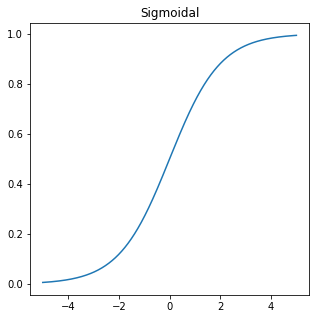

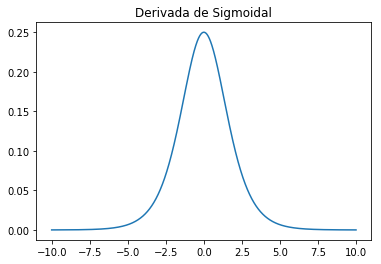

In [22]:
from matplotlib import pyplot
%matplotlib inline
x = np.linspace(-5, 5,10000) #variemos el último valor. 50 es el valor por defecto
#print (x)
y=[]
for cosa in x:
    y.append(sigmoidal(cosa))
pyplot.figure(figsize=(5, 5))
pyplot.title('Sigmoidal')
pyplot.plot(x, y)
pyplot.show()

x = np.linspace(-10, 10,10000) #variemos el último valor. 50 es el valor por defecto
#print (x)
y=[]
for cosa in x:
    y.append(d_sigmoidal(cosa))
pyplot.title('Derivada de Sigmoidal')
pyplot.plot(x, y)
pyplot.show()

In [34]:
arquitectura=size_layers(3,4,32,16,3) 
modelo=NN_2ocultas(3, arquitectura)
errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1,"ce", "grad",0, 0.1) 
promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)


Epoch:  0
--- 0.35932159423828125 seconds ---
Epoch:  1
--- 0.33112168312072754 seconds ---
Epoch:  2
--- 0.33428239822387695 seconds ---
Epoch:  3
--- 0.34544849395751953 seconds ---
Epoch:  4
--- 0.34430789947509766 seconds ---
Epoch:  5
--- 0.33863067626953125 seconds ---
Epoch:  6
--- 0.33245086669921875 seconds ---
Epoch:  7
--- 0.3343393802642822 seconds ---
Epoch:  8
--- 0.33023548126220703 seconds ---
Epoch:  9
--- 0.32944345474243164 seconds ---
Epoch:  10
--- 0.3247251510620117 seconds ---
Epoch:  11
--- 0.33020520210266113 seconds ---
Epoch:  12
--- 0.32378172874450684 seconds ---
Epoch:  13
--- 0.33585333824157715 seconds ---
Epoch:  14
--- 0.32233166694641113 seconds ---
Epoch:  15
--- 0.3247408866882324 seconds ---
Epoch:  16
--- 0.31931281089782715 seconds ---
Epoch:  17
--- 0.32369184494018555 seconds ---
Epoch:  18
--- 0.32094311714172363 seconds ---
Epoch:  19
--- 0.3311021327972412 seconds ---
Epoch:  20
--- 0.32660937309265137 seconds ---
Epoch:  21
--- 0.3220164775

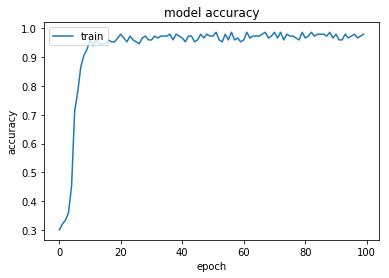

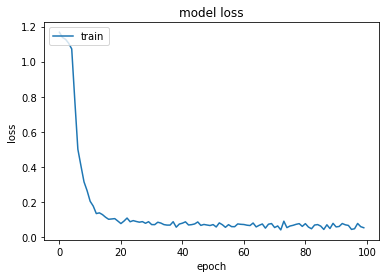

In [35]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

En los gráficos presentados es posible apreciar que el **accuracy** sobrepasó el **95%**, lo que indica que de los 150 ejemplos de entrenamiento de cada epoch, la configuración "ce" logró predecir correctamente más de 143 de ellos. Mientras que la función de pérdida (**loss**) se corresponde con lo acusado por accuracy, decayendo hasta niveles por debajo del 0.2.

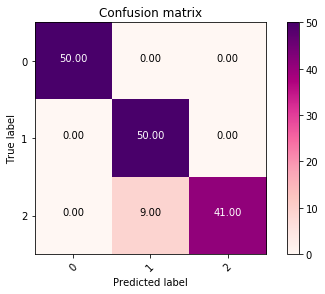

In [36]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

y_pred =prediccion(modelo,X_train, y_onehot,arquitectura,"sigmoid")
for i in range(len(y_pred)):
    y_pred[i]-=1
np.vstack((y_train,y_pred)).T

cm=confusion_matrix(y_train, y_pred)
title='Confusion matrix'
cmap=plt.cm.RdPu
classes=[0,1,2]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

La matriz de confusión aquí presentada, indica que de los 50 ejemplos de entrenamiento por cada una de las clases existentes, la configuración de "sigmoid + ce" exhibe un buen rendimiento cuando se le atribuye una tasa de aprendizaje del 0.1, la cual es relativamente alta. En cambio, si se le entregase como parámetro una tasa de aprendizaje mucho más baja, similar a la que se configurará para "RelU + ce" (0.005), por simple inspección de los gráficos, se puede afirmar que la función de activación sigmoidal retrasa el proceso de aprendizaje, dicho de otra manera, la red neuronal ajusta más lentamente sus parámetros. 

In [37]:
arquitectura=size_layers(3,4,32,16,3) 
modelo=NN_2ocultas(3, arquitectura)
errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.005,"ce", "grad",0, 0.1) 
promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

Epoch:  0
--- 0.3485982418060303 seconds ---
Epoch:  1
--- 0.33605408668518066 seconds ---
Epoch:  2
--- 0.3357367515563965 seconds ---
Epoch:  3
--- 0.3317604064941406 seconds ---
Epoch:  4
--- 0.33057451248168945 seconds ---
Epoch:  5
--- 0.33535075187683105 seconds ---
Epoch:  6
--- 0.32521867752075195 seconds ---
Epoch:  7
--- 0.3258187770843506 seconds ---
Epoch:  8
--- 0.32741260528564453 seconds ---
Epoch:  9
--- 0.32937049865722656 seconds ---
Epoch:  10
--- 0.3198971748352051 seconds ---
Epoch:  11
--- 0.32862043380737305 seconds ---
Epoch:  12
--- 0.32462406158447266 seconds ---
Epoch:  13
--- 0.33155274391174316 seconds ---
Epoch:  14
--- 0.32085657119750977 seconds ---
Epoch:  15
--- 0.3336794376373291 seconds ---
Epoch:  16
--- 0.3190338611602783 seconds ---
Epoch:  17
--- 0.32709765434265137 seconds ---
Epoch:  18
--- 0.3232612609863281 seconds ---
Epoch:  19
--- 0.3250916004180908 seconds ---
Epoch:  20
--- 0.32489967346191406 seconds ---
Epoch:  21
--- 0.318906307220459

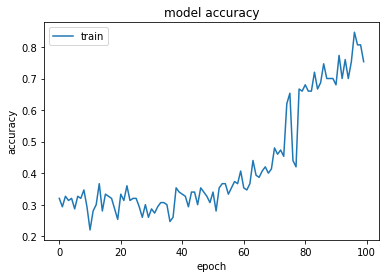

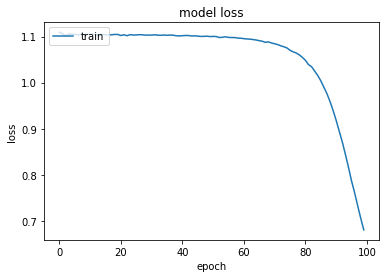

In [38]:
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Efectivamente, el nivel de accuracy es mucho más bajo del ya expuesto anteriormente. Del mismo modo, los valores de pérdida son igualmente mayores.  
Esto acusa la deficiencia en su proceso de aprendizaje, traducíéndose en la predicción incorrecta de una de las clases (la segunda).  

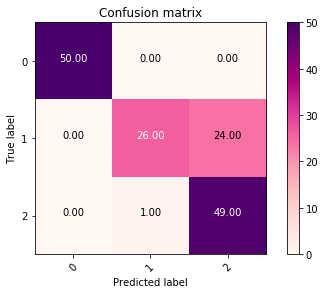

In [39]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

y_pred =prediccion(modelo,X_train, y_onehot,arquitectura,"sigmoid")
for i in range(len(y_pred)):
    y_pred[i]-=1
np.vstack((y_train,y_pred)).T

cm=confusion_matrix(y_train, y_pred)
title='Confusion matrix'
cmap=plt.cm.RdPu
classes=[0,1,2]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### RELU 


A continuación se presentan los gráficos de la función de activación ReLu y su derivada.

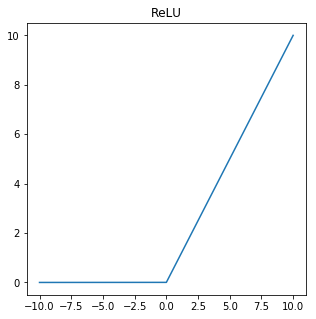

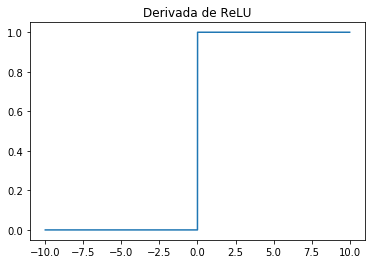

In [74]:
from matplotlib import pyplot
%matplotlib inline
x = np.linspace(-10, 10,10000) #variemos el último valor. 50 es el valor por defecto
y=[]
for cosa in x:
    y.append(relu(cosa))
pyplot.figure(figsize=(5, 5))
pyplot.title('ReLU')
pyplot.plot(x, y)
pyplot.show()


x = np.linspace(-10, 10,10000) #variemos el último valor. 50 es el valor por defecto
y=[]
for cosa in x:
    y.append(d_relu(cosa))
pyplot.title('Derivada de ReLU')
pyplot.plot(x, y)
pyplot.show()



Por otro lado cuando se detectó del error provocado por los learning rates fue más dificil, con función de activación Sigmoid no existía error, ya que de buenas a primeras se utilizó un learning rate apropiado para la función de activacion, pero al intentar utilizar Relu como la función de activación con el mismo rate, la red neuronal no pasaba de un 0.33 de accuracy (o 0.77 de miss clasification error). En su momento se revisó todo lo que se nos iba ocurriendo, desde el código, hasta la implementación de funciones y referencias entre variables, incluso revisando los valores de los pesos y sus actualizaciones a mano. El código a continuación se utilizó para encontrar un learning rate más apropiado:

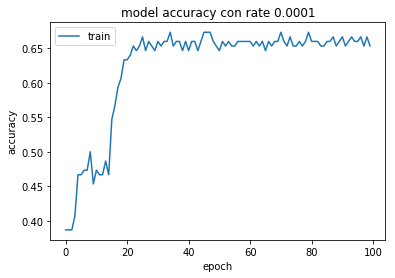

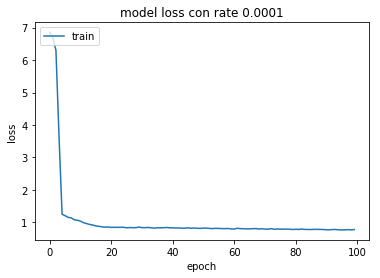

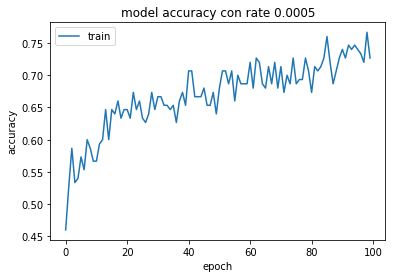

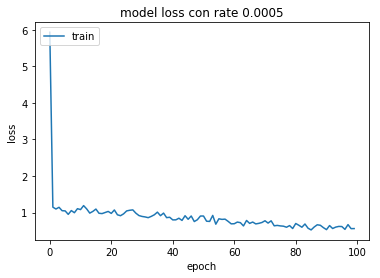

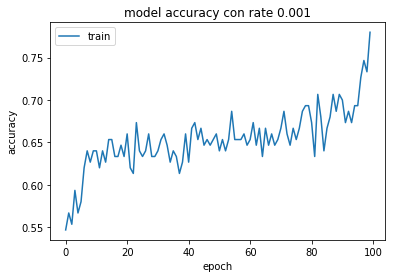

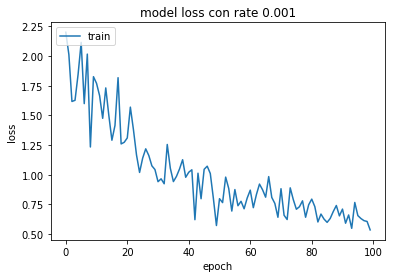

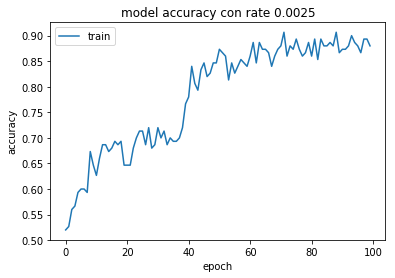

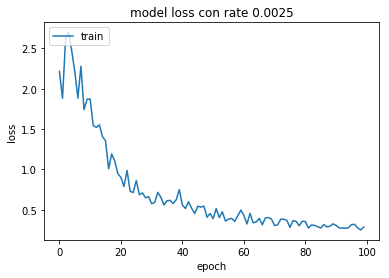

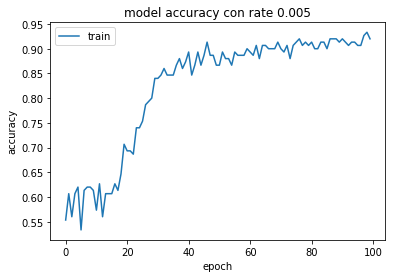

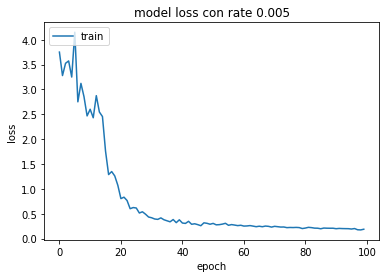

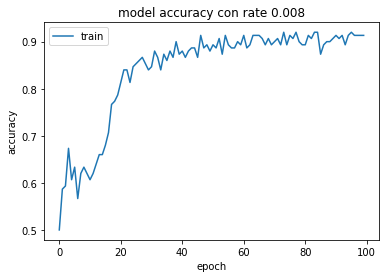

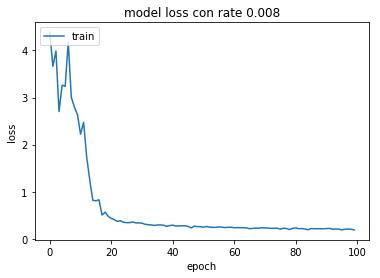

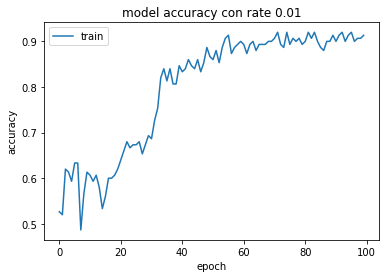

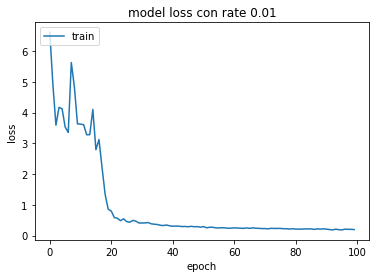

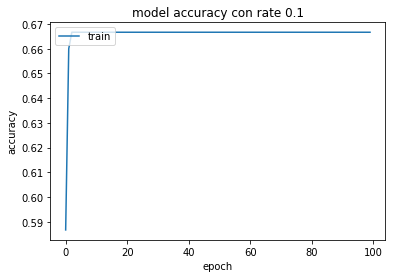

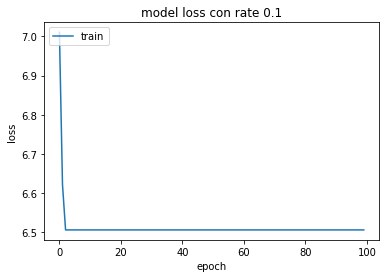

In [15]:
#para probar learning rate:
rates=[0.0001,0.0005,0.001,0.0025,
       0.005,0.008, 0.01, 0.1]

for rate in rates:

    arquitectura=size_layers(3,4,32,16,3)
    modelo=NN_2ocultas(3, arquitectura)
    errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "relu", rate, "ce","grad",0, 0.1)
    promerr=[]
    promacc=[]
    #calculo de los promedios por epoch
    for i in range(len(errores)):
        prome=np.mean(errores[i])
        proma=np.mean(accs[i])
        promerr.append(prome)
        promacc.append(proma)
        
    # Grafico para el accuracy
    import matplotlib.pyplot as plt
    plt.plot(promacc)
    plt.title('model accuracy con rate '+str(rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Grafico para el Loss
    plt.plot(promerr)
    plt.title('model loss con rate '+str(rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()


Esto da cuenta de lo importancia del learning rate, el cual permite a la función moverse en la dirección del gradiente del Loss, por lo que si es muy grande probablemente el algoritmo se salga de los óptimos y no pueda explotar nunca el espacio de soluciones, por otro lado si es muy pequeño se demorará en converger hacia una solución de calidad, puesto que el salto es muy pequeño.

Epoch:  0
--- 0.25405144691467285 seconds ---
Epoch:  1
--- 0.23743391036987305 seconds ---
Epoch:  2
--- 0.26676082611083984 seconds ---
Epoch:  3
--- 0.30916810035705566 seconds ---
Epoch:  4
--- 0.26257848739624023 seconds ---
Epoch:  5
--- 0.2671694755554199 seconds ---
Epoch:  6
--- 0.2456352710723877 seconds ---
Epoch:  7
--- 0.23713898658752441 seconds ---
Epoch:  8
--- 0.23738455772399902 seconds ---
Epoch:  9
--- 0.2403266429901123 seconds ---
Epoch:  10
--- 0.24553656578063965 seconds ---
Epoch:  11
--- 0.23331189155578613 seconds ---
Epoch:  12
--- 0.24264240264892578 seconds ---
Epoch:  13
--- 0.2397160530090332 seconds ---
Epoch:  14
--- 0.24203109741210938 seconds ---
Epoch:  15
--- 0.23636126518249512 seconds ---
Epoch:  16
--- 0.23528623580932617 seconds ---
Epoch:  17
--- 0.23587608337402344 seconds ---
Epoch:  18
--- 0.23117685317993164 seconds ---
Epoch:  19
--- 0.23408818244934082 seconds ---
Epoch:  20
--- 0.23396658897399902 seconds ---
Epoch:  21
--- 0.2357530593

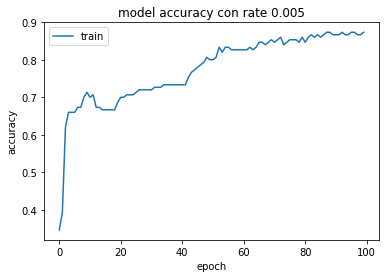

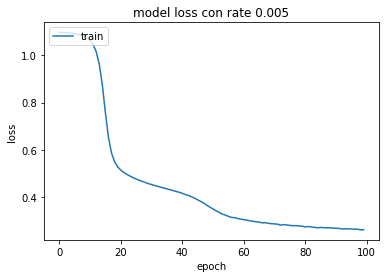

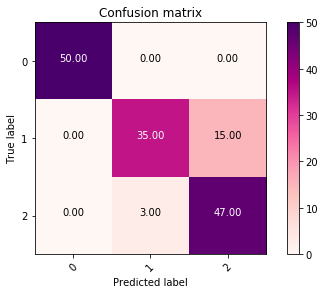

In [42]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

rate=0.005
arquitectura=size_layers(3,4,32,16,3)
modelo=NN_2ocultas(3, arquitectura)
errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "relu", rate, "ce","grad",0, 0.1)
promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)
        
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy con rate '+str(rate))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss con rate '+str(rate))
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()


y_pred =prediccion(modelo,X_train, y_onehot,arquitectura,"relu")
for i in range(len(y_pred)):
    y_pred[i]-=1
np.vstack((y_train,y_pred)).T

cm=confusion_matrix(y_train, y_pred)
title='Confusion matrix'
cmap=plt.cm.RdPu
classes=[0,1,2]
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f' if True else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
    horizontalalignment="center",
    color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Si se ajustara mejor el learning rate probablemente se podría mejorar la matriz de confusión.

Epoch:  0
--- 0.2473137378692627 seconds ---
Epoch:  1
--- 0.2466278076171875 seconds ---
Epoch:  2
--- 0.23581576347351074 seconds ---
Epoch:  3
--- 0.26871705055236816 seconds ---
Epoch:  4
--- 0.24683761596679688 seconds ---
Epoch:  5
--- 0.23682594299316406 seconds ---
Epoch:  6
--- 0.23818445205688477 seconds ---
Epoch:  7
--- 0.2630577087402344 seconds ---
Epoch:  8
--- 0.2670900821685791 seconds ---
Epoch:  9
--- 0.26601743698120117 seconds ---
Epoch:  10
--- 0.25856804847717285 seconds ---
Epoch:  11
--- 0.2332761287689209 seconds ---
Epoch:  12
--- 0.2363283634185791 seconds ---
Epoch:  13
--- 0.23222732543945312 seconds ---
Epoch:  14
--- 0.23833370208740234 seconds ---
Epoch:  15
--- 0.25246405601501465 seconds ---
Epoch:  16
--- 0.23468923568725586 seconds ---
Epoch:  17
--- 0.24989891052246094 seconds ---
Epoch:  18
--- 0.23598551750183105 seconds ---
Epoch:  19
--- 0.23767518997192383 seconds ---
Epoch:  20
--- 0.23553061485290527 seconds ---
Epoch:  21
--- 0.230369091033

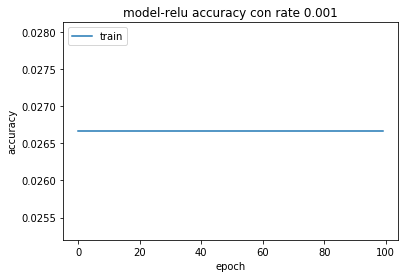

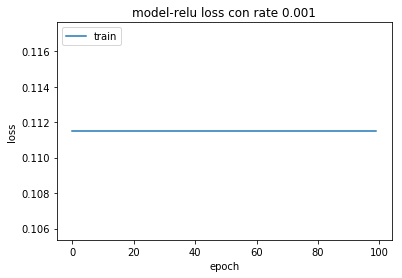

Epoch:  0
--- 0.25406432151794434 seconds ---
Epoch:  1
--- 0.22850942611694336 seconds ---
Epoch:  2
--- 0.23139619827270508 seconds ---
Epoch:  3
--- 0.23380732536315918 seconds ---
Epoch:  4
--- 0.2503693103790283 seconds ---
Epoch:  5
--- 0.25388121604919434 seconds ---
Epoch:  6
--- 0.23305654525756836 seconds ---
Epoch:  7
--- 0.23441410064697266 seconds ---
Epoch:  8
--- 0.2436847686767578 seconds ---
Epoch:  9
--- 0.36699795722961426 seconds ---
Epoch:  10
--- 0.2828960418701172 seconds ---
Epoch:  11
--- 0.24371004104614258 seconds ---
Epoch:  12
--- 0.26239681243896484 seconds ---
Epoch:  13
--- 0.23210883140563965 seconds ---
Epoch:  14
--- 0.25618553161621094 seconds ---
Epoch:  15
--- 0.24676060676574707 seconds ---
Epoch:  16
--- 0.2527198791503906 seconds ---
Epoch:  17
--- 0.270169734954834 seconds ---
Epoch:  18
--- 0.25417447090148926 seconds ---
Epoch:  19
--- 0.2749361991882324 seconds ---
Epoch:  20
--- 0.25482702255249023 seconds ---
Epoch:  21
--- 0.2691776752471

In [ ]:
#para probar learning rate:
rates=[0.001,0.0001,
       0.0001,0.0001,
       0.0005,0.0008,
       0.0025,0.00025]

for rate in rates:

    arquitectura=size_layers(3,4,32,16,3)
    modelo=NN_2ocultas(3, arquitectura)
    errores,accs = modelo.entrenamiento(arquitectura,X_train,y_onehot, "relu", rate, "mse","grad",0,0.1)

    promerr=[]
    promacc=[]
    #calculo de los promedios por epoch
    for i in range(len(errores)):
        prome=np.mean(errores[i])
        proma=np.mean(accs[i])
        promerr.append(prome)
        promacc.append(proma)
    # Grafico para el accuracy
    import matplotlib.pyplot as plt
    plt.plot(promacc)
    plt.title('model-relu accuracy con rate '+str(rate))
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Grafico para el Loss
    plt.plot(promerr)
    plt.title('model-relu loss con rate '+str(rate))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()


<a id="segundo"></a>
### 2. Comparar back-propagation (BP) de Keras

Keras es una de las librerı́as más populares para desarrollar nuevos modelos de redes neuronales o implementar eficientemente modelos conocidos con fines prácticos, puesto que ofrece una interfaz para poder trabajar de una manera mucho más simple además de permitir también el manejo de configuraciones mas específicas.  
Como actividad pedagógica ahora se les pide comparar el algoritmo implementado por ustedes con el de alto nivel de la librería __[keras](https://keras.io/)__ . Se les pedirá comparar sobre el mismo dataset con la misma arquitectura utilizada anteriormente, es decir, dos capas ocultas (con 32 y 16 neuronas respectivamente), 3 neuronas en la capa de salida con función de activación softmax, optimizador Gradiente Descentente (GD) con tasa de aprendizaje fija.

<img src="https://i.imgur.com/hUjFUDU.png" width="40%" height="40%" />


> a) Defina, a través de la interfaz de keras, la arquitectura de la red, con las funciones de activación para comparar con la sección anterior.
```python
from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid or relu"))
model.add(Dense(16, activation="sigmoid or relu"))
model.add(Dense(3, activation="softmax"))
```

> b) Defina, a través de la interfaz de keras, el optimizador de la red, en conjunto con la función de error, para poder comparar con la sección anterior.
```python
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy or mse", metrics=["accuracy"])
```

> c) Entrene (ajuste) los pesos de la red definida mediante keras, reportando los mismos gráficos de la sección anterior para poder comparar. Si hay diferencias en la convergencia del algoritmo ¿A qué podría deverse? si hay una gran diferencia en los tiempos de entrenamiento ¿A qué podría deverse?
```python
model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)
```

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
import keras
y_onehot = keras.utils.to_categorical(y_train)



from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="sigmoid"))
model.add(Dense(16, activation="sigmoid"))
model.add(Dense(3, activation="softmax"))

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.1),loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

#C
history = model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

# Los datos que estan en el history 
print(history.history.keys())


Epoch 1/100
150/150 [==============================] - 1s 5ms/step - loss: 1.0784 - acc: 0.4400
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.5589 - acc: 0.7600
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3815 - acc: 0.8333
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.2844 - acc: 0.9067
Epoch 5/100
150/150 [==============================] - 0s 3ms/step - loss: 0.2074 - acc: 0.9333
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1711 - acc: 0.9467
Epoch 7/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1328 - acc: 0.9600
Epoch 8/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1353 - acc: 0.9600
Epoch 9/100
150/150 [==============================] - 0s 3ms/step - loss: 0.1098 - acc: 0.9533
Epoch 10/100
150/150 [==============================] - 0s 2ms/step - loss: 0.1124 - acc: 0.9467
Epoch 11/100
150/150 [=================

150/150 [==============================] - 1s 4ms/step - loss: 0.0578 - acc: 0.9867
Epoch 86/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0675 - acc: 0.9733
Epoch 87/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0546 - acc: 0.9867
Epoch 88/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0673 - acc: 0.9733
Epoch 89/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0682 - acc: 0.9667
Epoch 90/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0582 - acc: 0.9733
Epoch 91/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0633 - acc: 0.9667
Epoch 92/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0540 - acc: 0.9733
Epoch 93/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0478 - acc: 0.9800
Epoch 94/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0742 - acc: 0.9733
Epoch 95/100
150/150 [=====================

150/150 [==============================] - 0s 2ms/step - loss: 0.0567 - acc: 0.9800
Epoch 70/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0556 - acc: 0.9667
Epoch 71/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0518 - acc: 0.9733
Epoch 72/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0586 - acc: 0.9733
Epoch 73/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0540 - acc: 0.9800
Epoch 74/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0508 - acc: 0.9867
Epoch 75/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0456 - acc: 0.9733
Epoch 76/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0582 - acc: 0.9733
Epoch 77/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0498 - acc: 0.9933
Epoch 78/100
150/150 [==============================] - 1s 3ms/step - loss: 0.0520 - acc: 0.9867
Epoch 79/100
150/150 [=====================

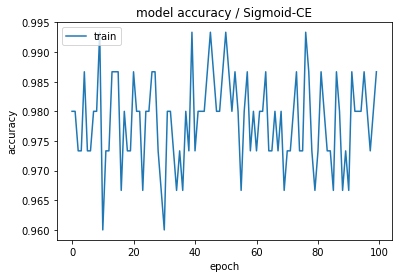

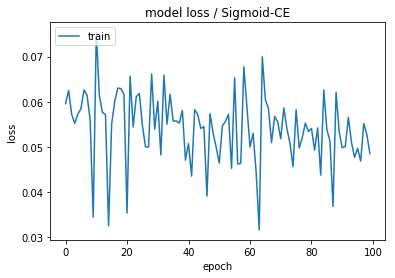

In [30]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy / Sigmoid-CE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(history.history['loss'])
plt.title('model loss / Sigmoid-CE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
import keras
y_onehot = keras.utils.to_categorical(y_train)



from keras.models import Sequential
from keras.layers.core import Dense
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(3, activation="softmax"))

from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.005),loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

#C
history = model.fit(X_train, y_onehot, epochs=100, batch_size=1, verbose=1)

# Los datos que estan en el history 
print(history.history.keys())

Epoch 1/100
150/150 [==============================] - 1s 5ms/step - loss: 0.8551 - acc: 0.6333
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6070 - acc: 0.7667
Epoch 3/100
150/150 [==============================] - 1s 3ms/step - loss: 0.4771 - acc: 0.8533
Epoch 4/100
150/150 [==============================] - 1s 3ms/step - loss: 0.4014 - acc: 0.8533
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3514 - acc: 0.8867
Epoch 6/100
150/150 [==============================] - 0s 3ms/step - loss: 0.3141 - acc: 0.8933
Epoch 7/100
150/150 [==============================] - 0s 3ms/step - loss: 0.2863 - acc: 0.8933
Epoch 8/100
150/150 [==============================] - 1s 4ms/step - loss: 0.2587 - acc: 0.9067
Epoch 9/100
150/150 [==============================] - 1s 5ms/step - loss: 0.2374 - acc: 0.9200
Epoch 10/100
150/150 [==============================] - 1s 4ms/step - loss: 0.2158 - acc: 0.9467
Epoch 11/100
150/150 [=================

150/150 [==============================] - 0s 3ms/step - loss: 0.0463 - acc: 0.9867
Epoch 86/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0459 - acc: 0.9867
Epoch 87/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0452 - acc: 0.9800
Epoch 88/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0436 - acc: 0.9867
Epoch 89/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0434 - acc: 0.9867
Epoch 90/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0459 - acc: 0.9800
Epoch 91/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0451 - acc: 0.9800
Epoch 92/100
150/150 [==============================] - 1s 5ms/step - loss: 0.0462 - acc: 0.9800
Epoch 93/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0451 - acc: 0.9867
Epoch 94/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0442 - acc: 0.9867
Epoch 95/100
150/150 [=====================

150/150 [==============================] - 0s 3ms/step - loss: 0.0431 - acc: 0.9867
Epoch 70/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0410 - acc: 0.9800
Epoch 71/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0406 - acc: 0.9800
Epoch 72/100
150/150 [==============================] - 1s 3ms/step - loss: 0.0415 - acc: 0.9867
Epoch 73/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0365 - acc: 0.9867
Epoch 74/100
150/150 [==============================] - 1s 3ms/step - loss: 0.0395 - acc: 0.9933
Epoch 75/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0381 - acc: 0.9733
Epoch 76/100
150/150 [==============================] - 0s 3ms/step - loss: 0.0361 - acc: 0.9867
Epoch 77/100
150/150 [==============================] - 1s 4ms/step - loss: 0.0401 - acc: 0.9867
Epoch 78/100
150/150 [==============================] - 0s 2ms/step - loss: 0.0411 - acc: 0.9867
Epoch 79/100
150/150 [=====================

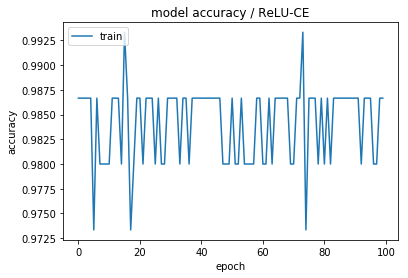

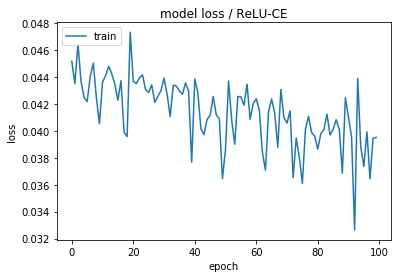

In [32]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.title('model accuracy / ReLU-CE')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Grafico para el Loss
plt.plot(history.history['loss'])
plt.title('model loss / ReLU-CE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

Al menos en lo que respecta a tiempos de entrenamiento no se difiere mucho, aunque keras puede demorarse más en computar cada epoch. La mayor diferencia es que los modelos creados en esta tarea parten con un accuracy malo, es decir, de alrededor de 30%, para luego empezar a subir y llegar hasta 95% aproximadamente; mientras que los modelos creados con la libreria keras parten con accuracy excelente y tratan de subirla aun más.

Esto puede deberse a que keras inicializa los pesos de manera "inteligente", mientras que los modelos hechos solo utilizando numpy inicializan los pesos de manera aleatorea en un rango [-1,1].

<a id="tercero"></a>
### 3. Verificación numérica del gradiente para una componente

En esta sección deberá verificar numéricamente el gradiente para los parámetros del modelo (que en este caso son los pesos de la red), que hasta ahora a definido de manera analítica en su programa, por ejemplo la derivada de $x^2$ es $2x$. Ahora deberá verificar estos cálculos usando la definición de gradiente.

$$ \nabla_{w} Loss = \lim_{\epsilon \rightarrow 0} \frac{Loss(w+ \epsilon)-Loss(w)}{\epsilon} $$

Debido a que el *forward propagation* es relativamente fácil de implementar, se puede confiar en que se realizó de manera correcta, por lo que el cómputo del error (*loss*) debería ser correcto. Esto significa que podemos verificar el gradiente o la derivada analítica del error $\frac{\partial Loss}{\partial w}$ comprobando que el resultado obtenido es similar (dentro de una tolerancia numérica, por ejemplo $10^6$) al valor que obtenemos aplicando la fórmula anterior. Naturalmente interpretaremos $\lim_{\epsilon \rightarrow 0}$ como un valor "*suficientemente pequeño*" de $\epsilon$.


> a) Para un peso escogido aleatoriamente entre la primera capa de la red (*input*) y la primera capa oculta, calcule el valor del gradiente de la función de error para ambas funciones utilizadas (ayúdese mediante las funciones de *backward pass* implementadas anteriormente), luego compare y verifique con el valor numérico del gradiente mediante el procedimiento explicado anteriormente.

> b) Vuelva a verificar el valor del gradiente para otros dos pesos escodigos aleatoriamente en la primera operación de la red. Compare y concluya.

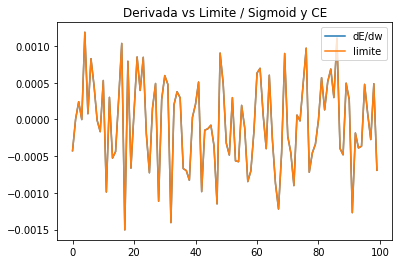

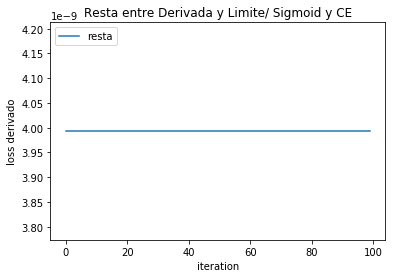

In [43]:
#Se hace un forward y una backward, se obtiene dE/dw, se hace guarda el L original, sobre los mismos pesos pero con uno alterado
#se tiene que hacer un forward para tener L(w+e) y verificar el limite

m_pesos_originales=[]

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_ejemplo=X_train[0]

import keras
y_onehot = keras.utils.to_categorical(y_train)
Y_ejemplo=y_onehot[0]


arquitectura=size_layers(3,4,32,16,3)
dw_v=[]
lim_v=[]
lista_total=[]
for i in range(100):
    modelo=NN_2ocultas(3, arquitectura)
    m_pesos_originales = modelo.m_pesos.copy()
    error,acc=modelo.training(X_ejemplo,Y_ejemplo,1,"ce","sigmoid", 0.1,"grad",0, 0.1)
    DE_Dw00 = modelo.e_m_pesos[0][0][0]
    dw_v.append(DE_Dw00)
    
    m_pesos_originales[0][0][0]+=epsilon 
    modelo2=NN_2ocultas(3, arquitectura)
    modelo2.m_pesos= m_pesos_originales.copy()
    error2,acc2=modelo2.training(X_ejemplo,Y_ejemplo,1,"ce","sigmoid", 0.1,"grad",0, 0.1)
    limite = (error2-error)/epsilon
    lim_v.append(limite)
    lista_total.append(i)

#print("dE/dw_v = ",dw_v)
#print("limite = ",lim_v)
ax = plt.gca()
ax.plot(lista_total,dw_v,label='dE/dw')
ax.plot(lista_total,lim_v,label='limite')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.title('Derivada vs Limite / Sigmoid y CE')
plt.show()

resta=[]
#resta=np.subtract(dw_v,lim_v)
for j in range(len(dw_v)):
    resta.append(dw_v[i]-lim_v[i])
plt.plot(resta)
plt.title('Resta entre Derivada y Limite/ Sigmoid y CE')
plt.ylabel('loss derivado')
plt.xlabel('iteration')
plt.legend(['resta'], loc='upper left')
plt.show()
#Diferencia de 1e-8 entre un valor y otro

El experimento se repitió 100 veces:

En el primer gráfico se grafican los valores de los valores de las derivadas del primer peso en la primera capa y al mismo tiempo el límite propuesto, el cual teoricamente debería condecirse con las derivadas. Como se puede apreciar a simple vista solo se ve una curva, pero en realidad son las dos que se superponen.
A modo de comprobación se presenta una curva de la diferencia de los dos valores, se puede apreciar que la diferencia es constante y es de aproximadamente 0.000000004, por lo que ambos valores solo varian en el noveno punto decimal, comprobando así que la derivada está bien definida.

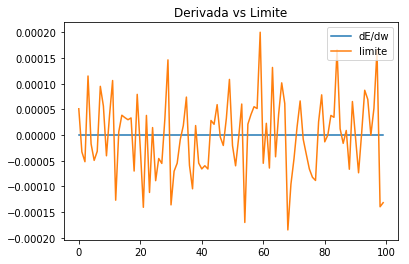

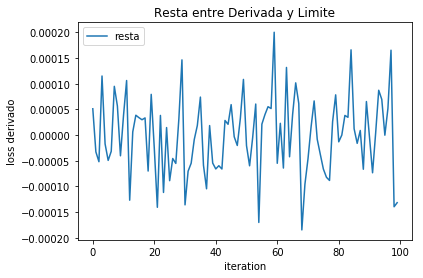

In [45]:
#Se hace un forward y una backward, se obtiene dE/dw, se hace guarda el L original, sobre los mismos pesos pero con uno alterado
#se tiene que hacer un forward para tener L(w+e) y verificar el limite

m_pesos_originales=[]

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_ejemplo=X_train[0]

import keras
y_onehot = keras.utils.to_categorical(y_train)
Y_ejemplo=y_onehot[0]


arquitectura=size_layers(3,4,32,16,3)
dw_v=[]
lim_v=[]
lista_total=[]
for i in range(100):
    modelo=NN_2ocultas(3, arquitectura)
    m_pesos_originales = modelo.m_pesos.copy()
    error,acc=modelo.training(X_ejemplo,Y_ejemplo,1,"mse","sigmoid", 0.1,"grad",0, 0.1)
    DE_Dw00 = modelo.e_m_pesos[0][0][0]
    dw_v.append(DE_Dw00)
    
    m_pesos_originales[0][0][0]+=epsilon 
    modelo2=NN_2ocultas(3, arquitectura)
    modelo2.m_pesos= m_pesos_originales.copy()
    error2,acc2=modelo2.training(X_ejemplo,Y_ejemplo,1,"mse","sigmoid", 0.1,"grad",0, 0.1)
    limite = (error2-error)/epsilon
    lim_v.append(limite)
    lista_total.append(i)

#print("dE/dw_v = ",dw_v)
#print("limite = ",lim_v)
ax = plt.gca()
ax.plot(lista_total,dw_v,label='dE/dw')
ax.plot(lista_total,lim_v,label='limite')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.title('Derivada vs Limite')
plt.show()

resta=[]
#resta=np.subtract(dw_v,lim_v)
for j in range(len(dw_v)):
    resta.append(lim_v[j]-dw_v[j])
plt.plot(resta)
plt.title('Resta entre Derivada y Limite')
plt.ylabel('loss derivado')
plt.xlabel('iteration')
plt.legend(['resta'], loc='upper left')
plt.show()

Este experimento también se repitió 100 veces:

En este caso las derivadas dieron aproximadamente 0 (1e-20, en promedio), mientras que los limites son del orden de 0.0001, si bien ambas son cercanas a 0 se presenta una lejanía de 16 cifras significativas.

A continuación se repite el primer experimento pero en vez de utilizar la primera neurona de la primera capa, se utilizan las neuronas dieciochoava y décimo primera, obteniendose los mismos resultados.

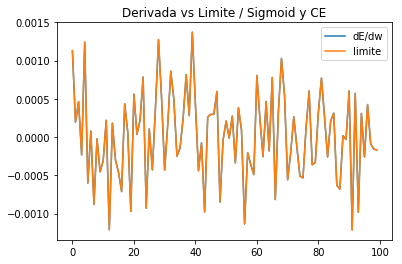

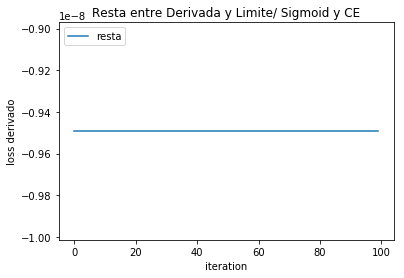

In [46]:
#Se hace un forward y una backward, se obtiene dE/dw, se hace guarda el L original, sobre los mismos pesos pero con uno alterado
#se tiene que hacer un forward para tener L(w+e) y verificar el limite

m_pesos_originales=[]

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_ejemplo=X_train[0]

import keras
y_onehot = keras.utils.to_categorical(y_train)
Y_ejemplo=y_onehot[0]


arquitectura=size_layers(3,4,32,16,3)
dw_v=[]
lim_v=[]
lista_total=[]
for i in range(100):
    modelo=NN_2ocultas(3, arquitectura)
    m_pesos_originales = modelo.m_pesos.copy()
    error,acc=modelo.training(X_ejemplo,Y_ejemplo,1,"ce","sigmoid", 0.1,"grad",0, 0.1)
    DE_Dw00 = modelo.e_m_pesos[0][0][17]
    dw_v.append(DE_Dw00)
    
    m_pesos_originales[0][0][17]+=epsilon 
    modelo2=NN_2ocultas(3, arquitectura)
    modelo2.m_pesos= m_pesos_originales.copy()
    error2,acc2=modelo2.training(X_ejemplo,Y_ejemplo,1,"ce","sigmoid", 0.1,"grad",0, 0.1)
    limite = (error2-error)/epsilon
    lim_v.append(limite)
    lista_total.append(i)

#print("dE/dw_v = ",dw_v)
#print("limite = ",lim_v)
ax = plt.gca()
ax.plot(lista_total,dw_v,label='dE/dw')
ax.plot(lista_total,lim_v,label='limite')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.title('Derivada vs Limite / Sigmoid y CE')
plt.show()

resta=[]
#resta=np.subtract(dw_v,lim_v)
for j in range(len(dw_v)):
    resta.append(dw_v[i]-lim_v[i])
plt.plot(resta)
plt.title('Resta entre Derivada y Limite/ Sigmoid y CE')
plt.ylabel('loss derivado')
plt.xlabel('iteration')
plt.legend(['resta'], loc='upper left')
plt.show()
#Diferencia de 1e-8 entre un valor y otro

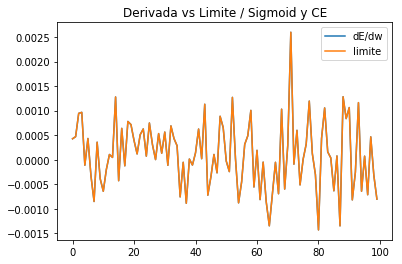

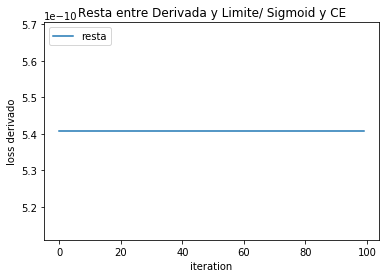

In [47]:
#Se hace un forward y una backward, se obtiene dE/dw, se hace guarda el L original, sobre los mismos pesos pero con uno alterado
#se tiene que hacer un forward para tener L(w+e) y verificar el limite

m_pesos_originales=[]

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
X_train,y_train = load_iris(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_ejemplo=X_train[0]

import keras
y_onehot = keras.utils.to_categorical(y_train)
Y_ejemplo=y_onehot[0]


arquitectura=size_layers(3,4,32,16,3)
dw_v=[]
lim_v=[]
lista_total=[]
for i in range(100):
    modelo=NN_2ocultas(3, arquitectura)
    m_pesos_originales = modelo.m_pesos.copy()
    error,acc=modelo.training(X_ejemplo,Y_ejemplo,1,"ce","sigmoid", 0.1,"grad",0, 0.1)
    DE_Dw00 = modelo.e_m_pesos[0][0][10]
    dw_v.append(DE_Dw00)
    
    m_pesos_originales[0][0][10]+=epsilon 
    modelo2=NN_2ocultas(3, arquitectura)
    modelo2.m_pesos= m_pesos_originales.copy()
    error2,acc2=modelo2.training(X_ejemplo,Y_ejemplo,1,"ce","sigmoid", 0.1,"grad",0, 0.1)
    limite = (error2-error)/epsilon
    lim_v.append(limite)
    lista_total.append(i)

#print("dE/dw_v = ",dw_v)
#print("limite = ",lim_v)
ax = plt.gca()
ax.plot(lista_total,dw_v,label='dE/dw')
ax.plot(lista_total,lim_v,label='limite')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.title('Derivada vs Limite / Sigmoid y CE')
plt.show()

resta=[]
#resta=np.subtract(dw_v,lim_v)
for j in range(len(dw_v)):
    resta.append(dw_v[i]-lim_v[i])
plt.plot(resta)
plt.title('Resta entre Derivada y Limite/ Sigmoid y CE')
plt.ylabel('loss derivado')
plt.xlabel('iteration')
plt.legend(['resta'], loc='upper left')
plt.show()
#Diferencia de 1e-8 entre un valor y otro

<a id="cuarto"></a>
### 4. Implementar *momentum* como variante

En esta sección deberá construir, sin usar librerı́as, excepto eventualmente *numpy* para implementar operaciones básicas de algebra lineal, una variante del programa definido anteriormente ([sección 1](#primero)) que entrene la red utilizando *momentum* clásico.

$$ v^{(t+1)} \leftarrow \mu v^{(t)} - \eta \nabla_{w^{(t)}} Loss \\
w^{(t+1)} \leftarrow w^{(t)} + v^{(t+1)}
$$

> *Sutskever, I., Martens, J., Dahl, G., & Hinton, G. (2013, February). On the importance of initialization and momentum in deep learning. In International conference on machine learning (pp. 1139-1147).*


Demuestre que su programa funciona en el mismo problema de clasificación presentado anteriormente, para esto, además deberá construir un gráfico de la función de error o pérdida (*loss*) *vs* el número de *epochs* y comentar/analizar la convergencia. ¿Es una mejora significativa? 

In [56]:
def backwarding_momentum(total_capas, vector_x, vector_y, tipo_error ,tasa, salida_l, da_salida_l,e_salida_l,m_pesos, vector_arquit,e_m_pesos, mu, momentums):
    #inicializacion de momentum (vector de largo 16 compuesto por zeros)
    if tipo_error=="mse":        
        error_EA=np.sum(d_error_mse(vector_y,salida_l[-2]))
    else:
        error_EA=d_error_CE(vector_y,salida_l[-2])  
        error_EA = np.sum(error_EA)
        
    momentum_capa=momentums[total_capas-1].T.copy()
    m_pesos_copia=m_pesos.copy()
    for neurona_final in range(vector_arquit[-1]):
        error_EW_n=error_EA*da_salida_l[-2][neurona_final]*np.array(salida_l[-3])
        e_m_pesos_T=e_m_pesos[total_capas-1].T.copy()
        e_m_pesos_T[neurona_final]=error_EW_n.copy()
        e_m_pesos[total_capas-1] = e_m_pesos_T.T.copy()    
        momentum= mu*momentum_capa[neurona_final]-(tasa*error_EW_n) 
        momentums[total_capas-1].T[neurona_final]=momentum.copy() 
        pesos_auxiliar=m_pesos[total_capas-1].T.copy()
        pesos_auxiliar[neurona_final]= pesos_auxiliar[neurona_final].copy()+momentum.copy() 
        m_pesos[total_capas-1]=pesos_auxiliar.T.copy()            #actualizacion in place
      
    e_salida_l[total_capas-1]=error_EA.copy()  
    for capa in np.arange(total_capas-2,-1,-1):                   #se mueve en capa 1 y 0
        error_aux=[]
        pesos_auxiliar2=m_pesos[capa].T.copy() #se hace (16x32 la matriz)
        momentum_capa=momentums[capa].T.copy()    #v_t
        for neurona in range(vector_arquit[capa+1]):
            error_EA_s=np.sum(e_salida_l[capa+1]*np.array(da_salida_l[capa+1])*m_pesos_copia[capa+1][neurona])     
            error_EW_s=error_EA_s*da_salida_l[capa][neurona]*np.array(salida_l[capa-1])
            e_m_pesos[capa].T[neurona]=error_EW_s.copy()
            momentum= mu*momentum_capa[neurona]-(tasa*error_EW_s) 
            momentums[capa].T[neurona]=momentum.copy()            
            arreglo=(pesos_auxiliar2[neurona].copy()+momentum.copy()).copy() #(vector de 32)
            pesos_auxiliar2[neurona]=arreglo.copy()  #se hace
            m_pesos[capa]=pesos_auxiliar2.T.copy()  
            error_aux.append(error_EA_s.copy())
            
        e_salida_l[capa]=error_aux.copy()

    return m_pesos,e_m_pesos

### Con reinicio de momentum por epoch

In [57]:
arquitectura=size_layers(3,4,32,16,3) 
modelo2=NN_2ocultas(3, arquitectura)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1,"ce", "momentum",1, 0.1) 
#modelo.entrenamiento(x,y,f_activ,tasa_aprend,tipo_backprop,bool_reinicio,tasa_momentum) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

150
Epoch:  0
--- 0.37702107429504395 seconds ---
Epoch:  1
--- 0.3659968376159668 seconds ---
Epoch:  2
--- 0.3614308834075928 seconds ---
Epoch:  3
--- 0.37368011474609375 seconds ---
Epoch:  4
--- 0.35231852531433105 seconds ---
Epoch:  5
--- 0.37508106231689453 seconds ---
Epoch:  6
--- 0.41547322273254395 seconds ---
Epoch:  7
--- 0.37511610984802246 seconds ---
Epoch:  8
--- 0.3666677474975586 seconds ---
Epoch:  9
--- 0.4278907775878906 seconds ---
Epoch:  10
--- 0.39305710792541504 seconds ---
Epoch:  11
--- 0.3811790943145752 seconds ---
Epoch:  12
--- 0.35353970527648926 seconds ---
Epoch:  13
--- 0.3681020736694336 seconds ---
Epoch:  14
--- 0.4125251770019531 seconds ---
Epoch:  15
--- 0.4086301326751709 seconds ---
Epoch:  16
--- 0.38629961013793945 seconds ---
Epoch:  17
--- 0.41797304153442383 seconds ---
Epoch:  18
--- 0.3883354663848877 seconds ---
Epoch:  19
--- 0.35800909996032715 seconds ---
Epoch:  20
--- 0.35307931900024414 seconds ---
Epoch:  21
--- 0.35058426856

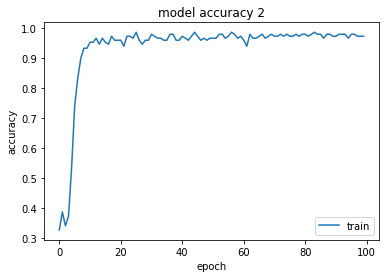

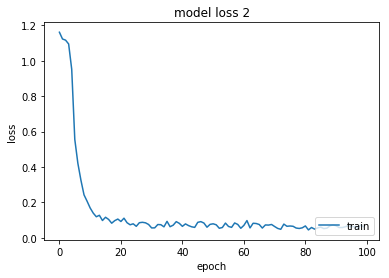

In [58]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

El gráfico anterior revela que el uso de momentum acelera la convergencia del algoritmo hacia un alto nivel de accuracy. Si bien, esto no resulta evidente, se presenta el uso de momentum para una tasa de aprendizaje mucho menor (0.005) a fin de compararlo con método de backpropagation mediante gradiente puro.   
Una ventaja del uso de momentum, corresponde a que dicho enfoque permite superar zonas de poco gradiente (nula actualización cuando se utiliza sólo gradiente) así como de pequeños mínimos locales. Sin embargo, el rol de la tasa de momentum es un factor determinante que se debe establecer con cuidado puesto que los efectos pueden diferir bastante. Tal como se aprecia a continuación. 


In [70]:
arquitectura=size_layers(3,4,32,16,3)
modelo2=NN_2ocultas(3, arquitectura)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.005,"ce", "momentum",1, 0.02) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

150
Epoch:  0
--- 0.385270357131958 seconds ---
Epoch:  1
--- 0.35584163665771484 seconds ---
Epoch:  2
--- 0.3563194274902344 seconds ---
Epoch:  3
--- 0.3528430461883545 seconds ---
Epoch:  4
--- 0.40622758865356445 seconds ---
Epoch:  5
--- 0.39612817764282227 seconds ---
Epoch:  6
--- 0.3631885051727295 seconds ---
Epoch:  7
--- 0.3920161724090576 seconds ---
Epoch:  8
--- 0.3917207717895508 seconds ---
Epoch:  9
--- 0.39760279655456543 seconds ---
Epoch:  10
--- 0.3561439514160156 seconds ---
Epoch:  11
--- 0.3559443950653076 seconds ---
Epoch:  12
--- 0.36092376708984375 seconds ---
Epoch:  13
--- 0.3523213863372803 seconds ---
Epoch:  14
--- 0.3540647029876709 seconds ---
Epoch:  15
--- 0.3787689208984375 seconds ---
Epoch:  16
--- 0.4384884834289551 seconds ---
Epoch:  17
--- 0.3674135208129883 seconds ---
Epoch:  18
--- 0.3548085689544678 seconds ---
Epoch:  19
--- 0.4015021324157715 seconds ---
Epoch:  20
--- 0.3561365604400635 seconds ---
Epoch:  21
--- 0.35308837890625 seco

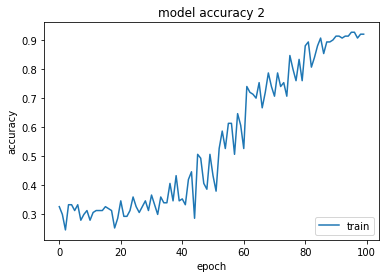

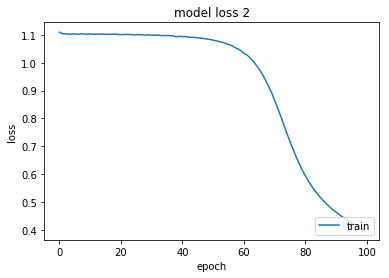

In [71]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

In [68]:
arquitectura=size_layers(3,4,32,16,3)
modelo2=NN_2ocultas(3, arquitectura)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.005,"ce", "momentum",1, 0.5) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

150
Epoch:  0
--- 0.518531084060669 seconds ---
Epoch:  1
--- 0.36695051193237305 seconds ---
Epoch:  2
--- 0.37798118591308594 seconds ---
Epoch:  3
--- 0.39992666244506836 seconds ---
Epoch:  4
--- 0.39107251167297363 seconds ---
Epoch:  5
--- 0.3745870590209961 seconds ---
Epoch:  6
--- 0.36333703994750977 seconds ---
Epoch:  7
--- 0.37071728706359863 seconds ---
Epoch:  8
--- 0.3691723346710205 seconds ---
Epoch:  9
--- 0.3913538455963135 seconds ---
Epoch:  10
--- 0.3868417739868164 seconds ---
Epoch:  11
--- 0.3630211353302002 seconds ---
Epoch:  12
--- 0.3637406826019287 seconds ---
Epoch:  13
--- 0.3621242046356201 seconds ---
Epoch:  14
--- 0.3735198974609375 seconds ---
Epoch:  15
--- 0.360368013381958 seconds ---
Epoch:  16
--- 0.3609590530395508 seconds ---
Epoch:  17
--- 0.4029712677001953 seconds ---
Epoch:  18
--- 0.4089653491973877 seconds ---
Epoch:  19
--- 0.42590880393981934 seconds ---
Epoch:  20
--- 0.38976550102233887 seconds ---
Epoch:  21
--- 0.3724174499511719 

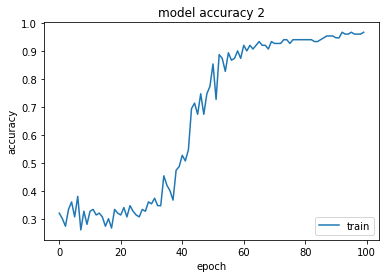

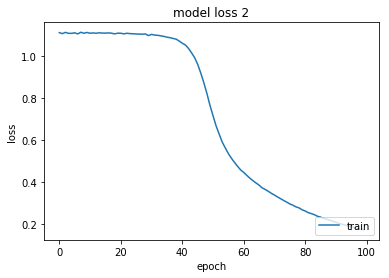

In [69]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 2')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 2')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

### Sin reinicio de momentum por epoch

A continuar se presenta backpropagation configurando el reinicio del momentum inicial al inicio de cada epoch. Sin embargo, no se detectaron diferencias sustanciales por lo que sólo se muestra una de las configuraciones.

In [72]:
arquitectura=size_layers(3,4,32,16,3) #(3,4,32,16,3)
modelo2=NN_2ocultas(3, arquitectura)
#print ("MPESOS ORIGINAL",modelo2.m_pesos)
print (X_train.shape[0])
errores,accs = modelo2.entrenamiento(arquitectura,X_train,y_onehot, "sigmoid", 0.1,"ce", "momentum",1, 0.1)  
#modelo.entrenamiento(x,y,f_activ,tasa_aprend,tipo_backprop,bool_reinicio,tasa_momentum) 

promerr=[]
promacc=[]
#calculo de los promedios por epoch
for i in range(len(errores)):
    prome=np.mean(errores[i])
    proma=np.mean(accs[i])
    promerr.append(prome)
    promacc.append(proma)

print ("MPESOS FINAL",modelo.m_pesos)

150
Epoch:  0
--- 0.4143259525299072 seconds ---
Epoch:  1
--- 0.3501734733581543 seconds ---
Epoch:  2
--- 0.38939952850341797 seconds ---
Epoch:  3
--- 0.3982858657836914 seconds ---
Epoch:  4
--- 0.35706472396850586 seconds ---
Epoch:  5
--- 0.3507802486419678 seconds ---
Epoch:  6
--- 0.3556489944458008 seconds ---
Epoch:  7
--- 0.3674812316894531 seconds ---
Epoch:  8
--- 0.38945651054382324 seconds ---
Epoch:  9
--- 0.35965418815612793 seconds ---
Epoch:  10
--- 0.36209726333618164 seconds ---
Epoch:  11
--- 0.3508329391479492 seconds ---
Epoch:  12
--- 0.3493485450744629 seconds ---
Epoch:  13
--- 0.3489501476287842 seconds ---
Epoch:  14
--- 0.3516385555267334 seconds ---
Epoch:  15
--- 0.352266788482666 seconds ---
Epoch:  16
--- 0.352508544921875 seconds ---
Epoch:  17
--- 0.35423874855041504 seconds ---
Epoch:  18
--- 0.35486459732055664 seconds ---
Epoch:  19
--- 0.35384416580200195 seconds ---
Epoch:  20
--- 0.356081485748291 seconds ---
Epoch:  21
--- 0.3695998191833496 s

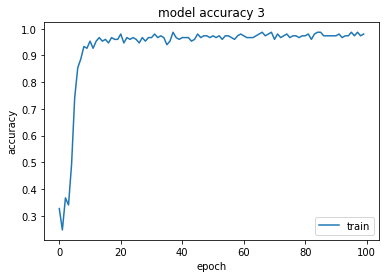

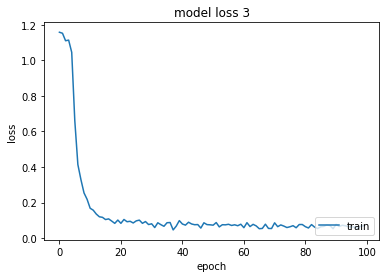

In [73]:
# Grafico para el accuracy
import matplotlib.pyplot as plt
plt.plot(promacc)
plt.title('model accuracy 3')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()

# Grafico para el Loss
plt.plot(promerr)
plt.title('model loss 3')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()